In [128]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, fbeta_score, f1_score

from loader import load_data

In [129]:
df = load_data('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Columns: 275 entries, persid to neckradicolopathy
dtypes: float64(47), object(228)
memory usage: 4.4+ MB


Show age in box plot

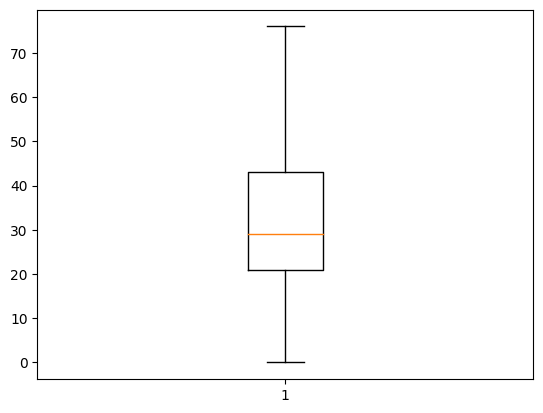

In [130]:
df = df[~df['age'].isna()]
plt.boxplot(df['age'], showfliers=False)
plt.show()

Scatter plot for len and weight.

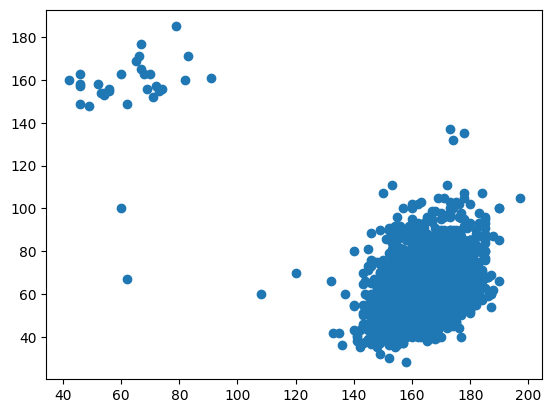

In [131]:
df = df[~df['len'].isna() & ~df['weight'].isna()]
# df['BMI'] = df['weight'] / ((df['len'] / 100)**2)
plt.scatter(df['len'], df['weight'], )
plt.show()

Calculate KneeOA and age correlation

Correlation: 0.3454504752502102


array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

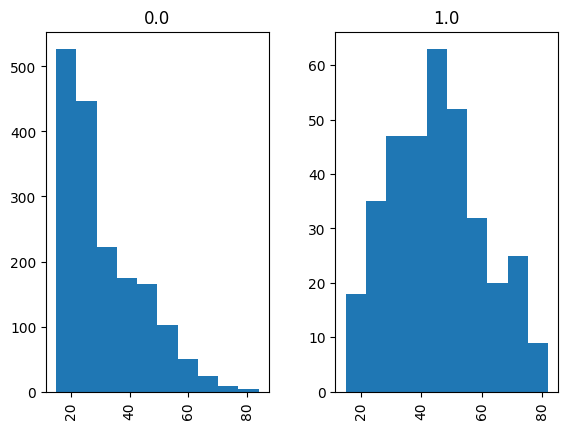

In [132]:
print("Correlation:", df['age'].corr(df['KneeOA'], method='spearman'))
df['age'].hist(df['KneeOA'])

Apply regression for `birthdat` column using `Agegroup` and `age` columns.

In [133]:
print("Birthday missing count:", df['birthdat'].isna().sum())
print("Correlation birthday and age group:", df['birthdat'].corr(df['Agegroup']))

df2 = df[~df['birthdat'].isna()]

X, y = df2[['age', 'Agegroup']], df2['birthdat']
reg = LinearRegression().fit(X, y)
reg.fit(X, y)

X_pred = df[df['birthdat'].isna()][['age', 'Agegroup']]
df['birthdat'].loc[df['birthdat'].isna()] = reg.predict(X_pred)
print("Birthday missing count after regression:", df['birthdat'].isna().sum())


Birthday missing count: 32
Correlation birthday and age group: -0.9663965862457486
Birthday missing count after regression: 0


Classification using Decision Tree, Bagging and KNN

In [135]:
df['knee'].corr(df['KneeOA'])
df0 = df[['age', 'weight', 'len', 'kn.pain', 'KneeOA']]
df0 = df0[~df0['kn.pain'].isna()]

X = df0.iloc[:,:-1]
y = df0.iloc[:,-1]

k = 10
kf = KFold(n_splits=k)

result = cross_val_score(DecisionTreeClassifier(), X, y, cv=kf)
print("Decision Tree:", result.mean())

result = cross_val_score(BaggingClassifier() , X, y, cv=kf)
print("Bagging:", result.mean())

result = cross_val_score(KNeighborsClassifier(3), X, y, cv=kf)
print("KNN:", result.mean())

Decision Tree: 0.7907251067023122
Bagging: 0.8226232353079125
KNN: 0.7979714835139065
